In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## Ingest exon-adjacent windows with ClinVar-SNV counts

The ClinVar data for Fig 4D of https://academic.oup.com/nar/article/50/14/e81/6583232?login=true can be found at: 
https://github.com/melobio/LOGO/blob/master/05_LOGO_Variant_Prioritization/2.%20data/4.%20Clinvar%20+%201000G_177Pos_177Neg/Clinvar_nc_snv_pathogenic_177Pos_177Neg.vcf

In [2]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import pandas as pd 

pd.set_option('display.max_columns', 30)

def wrangle_K_bar(df): 
    df['K_bar'] = pd.to_numeric(df['K_bar'], errors='coerce') # convert '.' to 'NaN'
    #     df = df.dropna(subset=['K_bar']) # drop windows for which K_bar == NaN
    df['negative K_bar'] = -df['K_bar']
    return df
    
def get_exon_adjacent_windows_with_clinvar():
    # This file produced by experiments/germline-model/chen-et-al-2022/add-clinvar-snv-counts-to-exon-adjacent-windows.sh
    filename = f'{CONSTRAINT_TOOLS_DATA}/genome-wide-predictions/predict-germline-grch38.exon-adjacent-windows-clinvar.bed'
    df = pd.read_csv(filename, sep='\t')
    df = wrangle_K_bar(df)
    df = df.drop_duplicates()
    return df 

exon_adjacent_windows_with_clinvar = get_exon_adjacent_windows_with_clinvar()
exon_adjacent_windows_with_clinvar

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,ClinVar SNV count,negative K_bar
0,chr1,137965,138965,138465,-5.920696,153,-3.264584,62,153,0,3.264584
1,chr1,779092,780092,779592,-5.238967,201,-0.464017,103,201,0,0.464017
2,chr1,780937,781937,781437,-5.710110,115,NaN,60,115,0,NaN
3,chr1,793041,794041,793541,-1.775055,174,-0.795124,88,174,0,0.795124
4,chr1,794470,795470,794970,-3.172094,165,-1.468295,79,165,0,1.468295
...,...,...,...,...,...,...,...,...,...,...,...
196495,chr22,45394767,45395767,45395267,-1.124268,182,-0.080995,97,182,0,0.080995
196496,chr22,45395346,45396346,45395846,-0.620804,195,0.134689,105,195,0,-0.134689
196497,chr22,45398095,45399095,45398595,-2.447314,195,-2.295835,86,195,0,2.295835
196498,chr22,45399353,45400353,45399853,-1.485594,180,0.049858,97,180,0,-0.049858


## Ingest exon-adjacent windows with Mendelian-associated variant counts

Noncoding variants associated with Mendelian traits (n = 427; used in Fig. 3b) are provided in Supplementary Table 3 of 
https://www.nature.com/articles/s41588-018-0062-7

Many "noncoding" variants actually overlap canonical exons: 

```
download-process-data/noncoding-variants-associated-with-Mendelian-traits/show-mendelian-variants-in-canonical-exons.sh
```

This might not be terribly meaningful, however, as, e.g., some parts of some canonical exons are UTRs for non-canonical exons.

In [3]:
def get_exon_adjacent_windows_with_mendelian_variants():
    # This file produced by experiments/germline-model/chen-et-al-2022/add-mendelian-variant-counts-to-exon-adjacent-windows.sh
    filename = f'{CONSTRAINT_TOOLS_DATA}/genome-wide-predictions/predict-germline-grch38.exon-adjacent-windows-mendelian-variants.bed'
    df = pd.read_csv(filename, sep='\t')
    df = wrangle_K_bar(df)
    df = df.drop_duplicates()
    return df 

exon_adjacent_windows_with_mendelian_variants = get_exon_adjacent_windows_with_mendelian_variants()
exon_adjacent_windows_with_mendelian_variants

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,Mendelian variant count,negative K_bar
0,chr1,137965,138965,138465,-5.920696,153,-3.264584,62,153,0,3.264584
1,chr1,779092,780092,779592,-5.238967,201,-0.464017,103,201,0,0.464017
2,chr1,780937,781937,781437,-5.710110,115,NaN,60,115,0,NaN
3,chr1,793041,794041,793541,-1.775055,174,-0.795124,88,174,0,0.795124
4,chr1,794470,795470,794970,-3.172094,165,-1.468295,79,165,0,1.468295
...,...,...,...,...,...,...,...,...,...,...,...
196495,chr22,45394767,45395767,45395267,-1.124268,182,-0.080995,97,182,0,0.080995
196496,chr22,45395346,45396346,45395846,-0.620804,195,0.134689,105,195,0,-0.134689
196497,chr22,45398095,45399095,45398595,-2.447314,195,-2.295835,86,195,0,2.295835
196498,chr22,45399353,45400353,45399853,-1.485594,180,0.049858,97,180,0,-0.049858


## Report both clinvar counts and mendelian-variant counts in same dataframe

In [4]:
exon_adjacent_windows_with_clinvar_mendelianVariants = exon_adjacent_windows_with_clinvar.merge(exon_adjacent_windows_with_mendelian_variants)
exon_adjacent_windows_with_clinvar_mendelianVariants.drop_duplicates()

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,ClinVar SNV count,negative K_bar,Mendelian variant count
0,chr1,137965,138965,138465,-5.920696,153,-3.264584,62,153,0,3.264584,0
1,chr1,779092,780092,779592,-5.238967,201,-0.464017,103,201,0,0.464017,0
2,chr1,780937,781937,781437,-5.710110,115,NaN,60,115,0,NaN,0
3,chr1,793041,794041,793541,-1.775055,174,-0.795124,88,174,0,0.795124,0
4,chr1,794470,795470,794970,-3.172094,165,-1.468295,79,165,0,1.468295,0
...,...,...,...,...,...,...,...,...,...,...,...,...
196459,chr22,45394767,45395767,45395267,-1.124268,182,-0.080995,97,182,0,0.080995,0
196460,chr22,45395346,45396346,45395846,-0.620804,195,0.134689,105,195,0,-0.134689,0
196461,chr22,45398095,45399095,45398595,-2.447314,195,-2.295835,86,195,0,2.295835,0
196462,chr22,45399353,45400353,45399853,-1.485594,180,0.049858,97,180,0,-0.049858,0


## Distribution of N_bar 

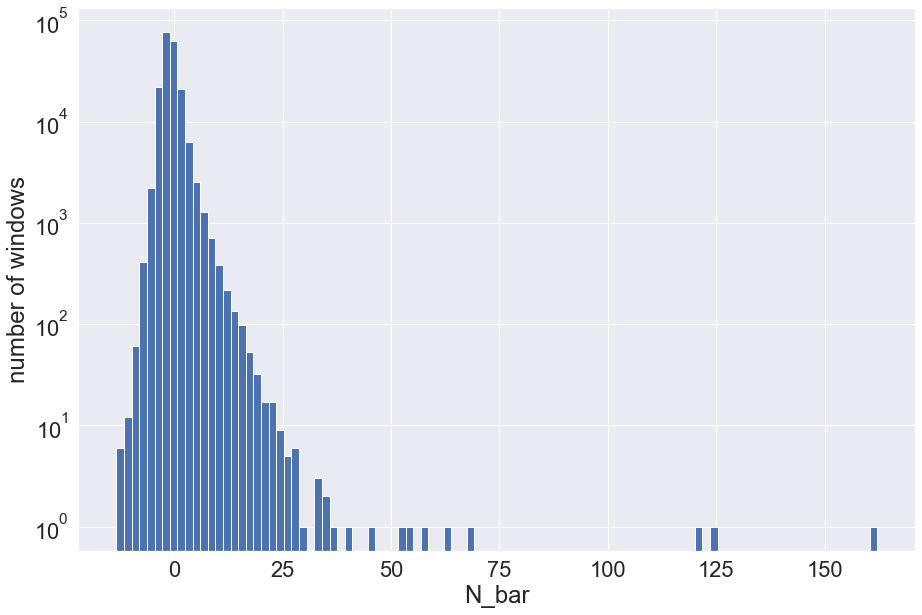

In [5]:
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15, 10)

import seaborn as sns 
sns.set(font_scale = 2)

def plot_distribution_N_bar(df): 
    axis = df['N_bar'].hist(bins=100)
    axis.set_yscale('log')
    axis.set_xlabel('N_bar')
    axis.set_ylabel('number of windows')

plot_distribution_N_bar(exon_adjacent_windows_with_clinvar_mendelianVariants)

## Filter out high-Nbar windows

In [6]:
def filter_high_Nbar(df):
    df = df[df['N_bar'] < 5]
    return df 

exon_adjacent_windows_with_clinvar_mendelianVariants = filter_high_Nbar(exon_adjacent_windows_with_clinvar_mendelianVariants)
exon_adjacent_windows_with_clinvar_mendelianVariants

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,ClinVar SNV count,negative K_bar,Mendelian variant count
0,chr1,137965,138965,138465,-5.920696,153,-3.264584,62,153,0,3.264584,0
1,chr1,779092,780092,779592,-5.238967,201,-0.464017,103,201,0,0.464017,0
2,chr1,780937,781937,781437,-5.710110,115,NaN,60,115,0,NaN,0
3,chr1,793041,794041,793541,-1.775055,174,-0.795124,88,174,0,0.795124,0
4,chr1,794470,795470,794970,-3.172094,165,-1.468295,79,165,0,1.468295,0
...,...,...,...,...,...,...,...,...,...,...,...,...
196459,chr22,45394767,45395767,45395267,-1.124268,182,-0.080995,97,182,0,0.080995,0
196460,chr22,45395346,45396346,45395846,-0.620804,195,0.134689,105,195,0,-0.134689,0
196461,chr22,45398095,45399095,45398595,-2.447314,195,-2.295835,86,195,0,2.295835,0
196462,chr22,45399353,45400353,45399853,-1.485594,180,0.049858,97,180,0,-0.049858,0


## Label windows with score quantiles 

In [7]:
import warnings

def label_windows_with_score_quantiles_core(df, score): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")        

#         array_of_quantiles = [0.00, 0.10, 0.25, 0.5, 0.75, 1.0]
        array_of_quantiles = [0.00, 0.25, 0.5, 0.75, 1.0]
        starts = array_of_quantiles[:-1]
        ends = array_of_quantiles[1:]
        quantile_labels = [f'{start} - {end}' for start, end in zip(starts, ends)]

        df[f'{score} quantile'], bins = pd.qcut(
            df[score],
            q = array_of_quantiles, 
            labels = quantile_labels, 
            retbins = True,
    #         duplicates='drop'
        )

        return df

def label_windows_with_score_quantiles(df):     
    df = label_windows_with_score_quantiles_core(df, score='N_bar')
    df = label_windows_with_score_quantiles_core(df, score='negative K_bar')
    return df

exon_adjacent_windows_with_clinvar_mendelianVariants = label_windows_with_score_quantiles(exon_adjacent_windows_with_clinvar_mendelianVariants)
exon_adjacent_windows_with_clinvar_mendelianVariants

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,ClinVar SNV count,negative K_bar,Mendelian variant count,N_bar quantile,negative K_bar quantile
0,chr1,137965,138965,138465,-5.920696,153,-3.264584,62,153,0,3.264584,0,0.0 - 0.25,0.75 - 1.0
1,chr1,779092,780092,779592,-5.238967,201,-0.464017,103,201,0,0.464017,0,0.0 - 0.25,0.5 - 0.75
2,chr1,780937,781937,781437,-5.710110,115,NaN,60,115,0,NaN,0,0.0 - 0.25,NaN
3,chr1,793041,794041,793541,-1.775055,174,-0.795124,88,174,0,0.795124,0,0.25 - 0.5,0.75 - 1.0
4,chr1,794470,795470,794970,-3.172094,165,-1.468295,79,165,0,1.468295,0,0.0 - 0.25,0.75 - 1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196459,chr22,45394767,45395767,45395267,-1.124268,182,-0.080995,97,182,0,0.080995,0,0.5 - 0.75,0.5 - 0.75
196460,chr22,45395346,45396346,45395846,-0.620804,195,0.134689,105,195,0,-0.134689,0,0.5 - 0.75,0.25 - 0.5
196461,chr22,45398095,45399095,45398595,-2.447314,195,-2.295835,86,195,0,2.295835,0,0.0 - 0.25,0.75 - 1.0
196462,chr22,45399353,45400353,45399853,-1.485594,180,0.049858,97,180,0,-0.049858,0,0.25 - 0.5,0.25 - 0.5


## McHale's zscores do not appear to enrich for "noncoding" pathogenic variants

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


number of windows harboring ClinVar SNVs: 33
number of windows in each quantile: [48077 48076 48076 48076]


<Figure size 1080x720 with 0 Axes>

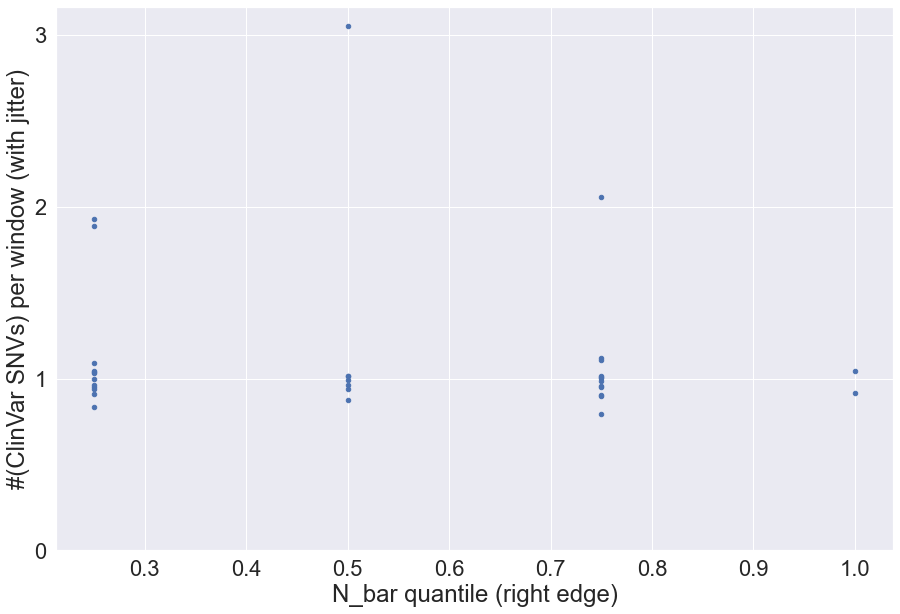

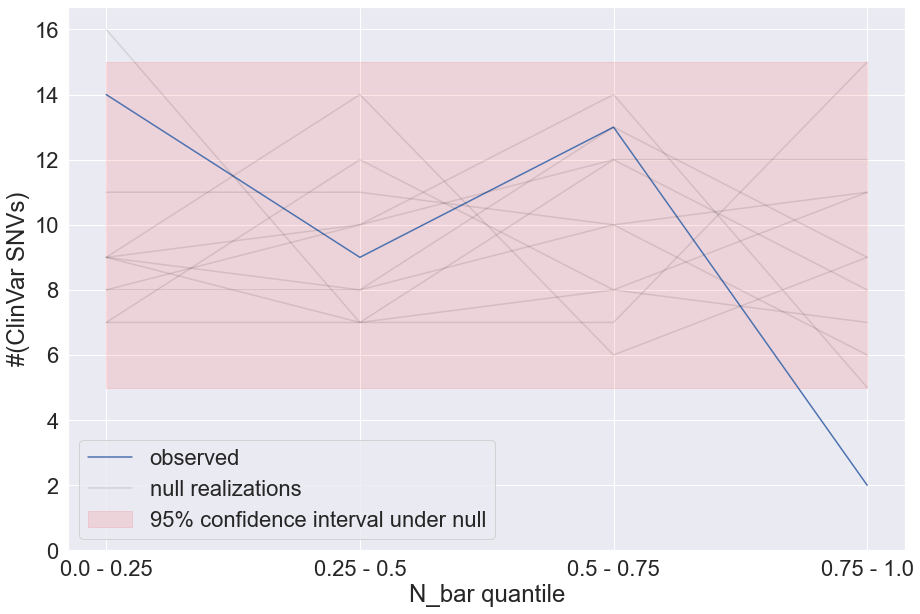

In [8]:
import numpy as np 
import math 

def plot_variant_harboring_windows_vs_quantiles(df, zscore, variant_type):
    df = df.copy() 
    df = df[df[f'{variant_type} count'] > 0]
    print(f'number of windows harboring {variant_type}s: {len(df)}')
    x = f'{zscore} quantile (right edge)'
    df[x] = df[f'{zscore} quantile'].map(lambda label: float(label.split('-')[1]))
    y = f'#({variant_type}s) per window (with jitter)' 
    df[y] = df[f'{variant_type} count'] + np.random.normal(scale=0.1, size=len(df))
    df.plot.scatter(x=x, y=y)
    plt.yscale('linear')
    plt.ylim([0, None])
    ylim_max = math.ceil(plt.gca().get_ylim()[1])
    yticks = range(ylim_max)
    plt.yticks(yticks)
    
def aggregate(df, zscore):
    groups = df.groupby([f'{zscore} quantile'])
    aggregated = groups.agg({
        'ClinVar SNV count': ['mean', 'std', 'count', 'sum'],
        'Mendelian variant count': ['mean', 'std', 'count', 'sum'],
    })
    return aggregated

def plot_pathogenic_enrichment_vs_quantile(df, zscore, variant_type):
    aggregated = aggregate(df, zscore)
    zscore_quantiles = np.array(aggregated.index)    
    window_counts = np.array(aggregated[(f'{variant_type} count', 'count')])
    print(f'number of windows in each quantile: {window_counts}')
    variant_counts_observed = np.array(aggregated[(f'{variant_type} count', 'sum')])
    variant_counts_total = np.sum(variant_counts_observed)
    zscore_quantile_probabilities_null = window_counts/np.sum(window_counts) 
    variant_counts_null = np.random.multinomial(variant_counts_total, zscore_quantile_probabilities_null, size=100000)
    mean_null = np.mean(variant_counts_null, axis=0)
    ci_lower_null = np.percentile(variant_counts_null, 2.5, axis=0) 
    ci_upper_null = np.percentile(variant_counts_null, 97.5, axis=0) 

    plt.plot(zscore_quantiles, variant_counts_observed, label='observed')
    plt.fill_between(
        zscore_quantiles, 
        ci_lower_null,
        ci_upper_null,
        alpha=0.1, 
        color='red',
        label='95% confidence interval under null'
    )
    alpha = 0.1
    plt.plot(zscore_quantiles, variant_counts_null[:10,:].T, alpha=alpha, color='black')
    plt.plot([],[], alpha=alpha, color='black', label='null realizations')
    plt.xlabel(f'{zscore} quantile')
    plt.ylabel(f'#({variant_type}s)')
    plt.legend()
    plt.ylim([0, None])
               
def plot_all(df, zscore, variant_type): 
    plt.figure()
    plot_variant_harboring_windows_vs_quantiles(df, zscore, variant_type)
#     _ = plt.yticks(np.arange(0,10,1))
    
    plt.figure()
    plot_pathogenic_enrichment_vs_quantile(df, zscore, variant_type)    
    
plot_all(exon_adjacent_windows_with_clinvar_mendelianVariants, zscore='N_bar', variant_type='ClinVar SNV')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


number of windows harboring ClinVar SNVs: 33
number of windows in each quantile: [48090 48084 48031 47965]


<Figure size 1080x720 with 0 Axes>

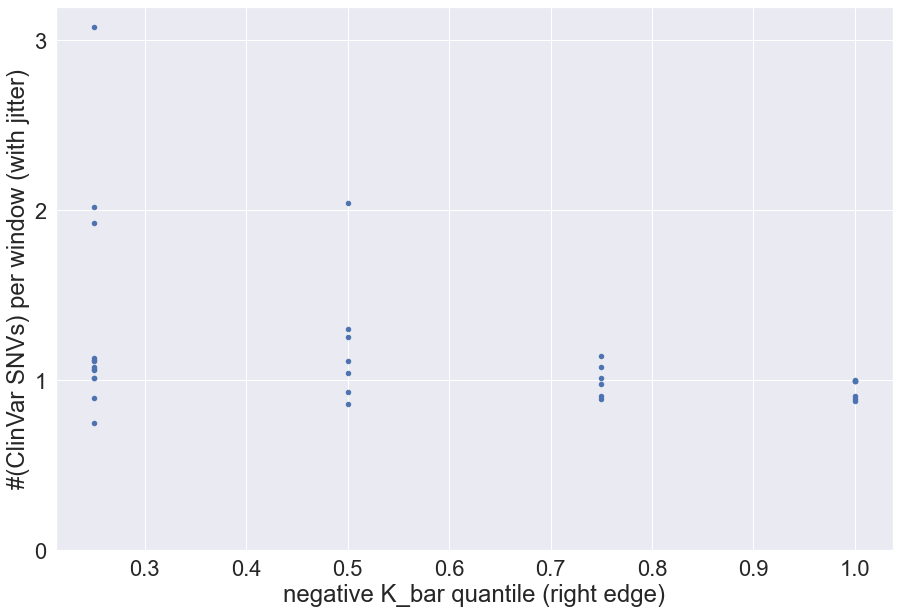

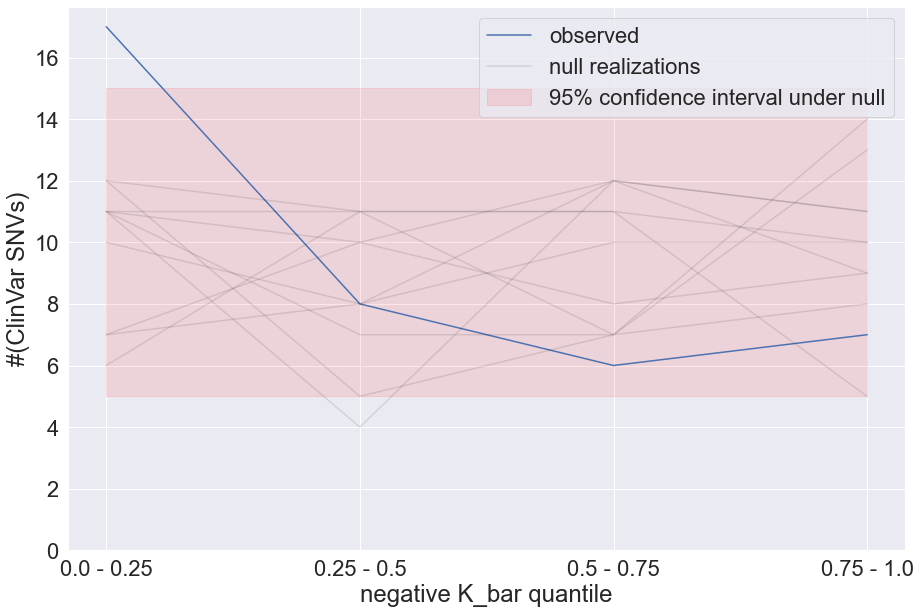

In [9]:
plot_all(exon_adjacent_windows_with_clinvar_mendelianVariants, zscore='negative K_bar', variant_type='ClinVar SNV')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


number of windows harboring Mendelian variants: 37
number of windows in each quantile: [48077 48076 48076 48076]


<Figure size 1080x720 with 0 Axes>

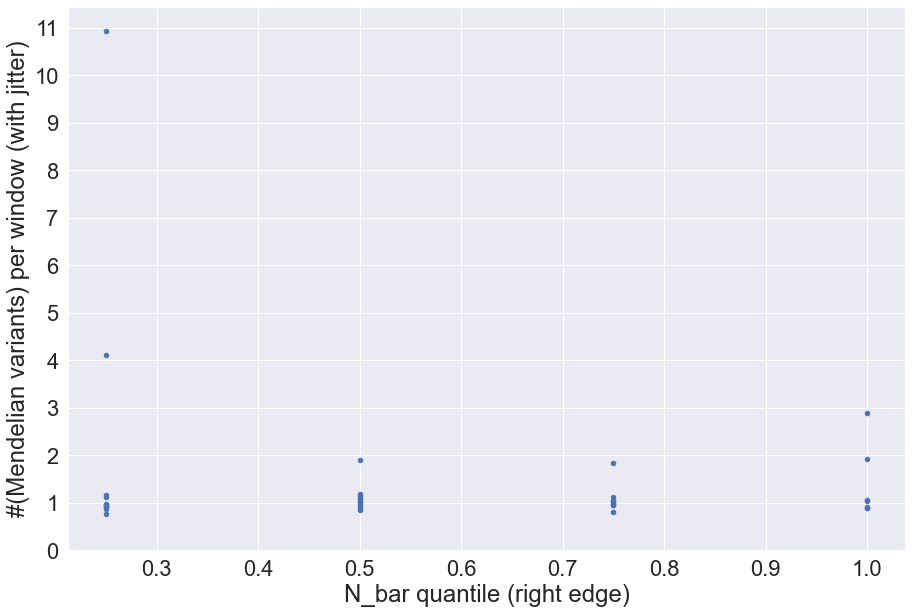

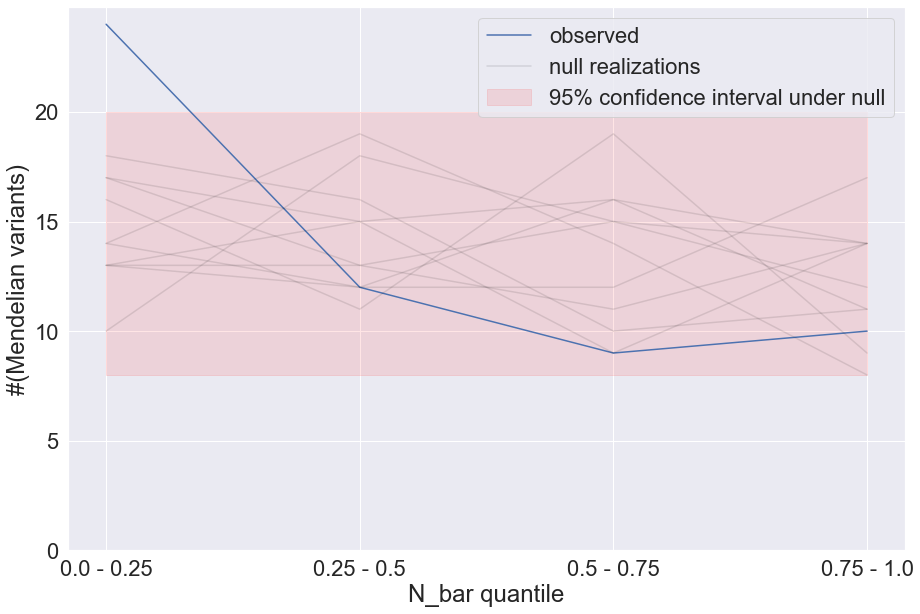

In [10]:
plot_all(exon_adjacent_windows_with_clinvar_mendelianVariants, zscore='N_bar', variant_type='Mendelian variant')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


number of windows harboring Mendelian variants: 37
number of windows in each quantile: [48090 48084 48031 47965]


<Figure size 1080x720 with 0 Axes>

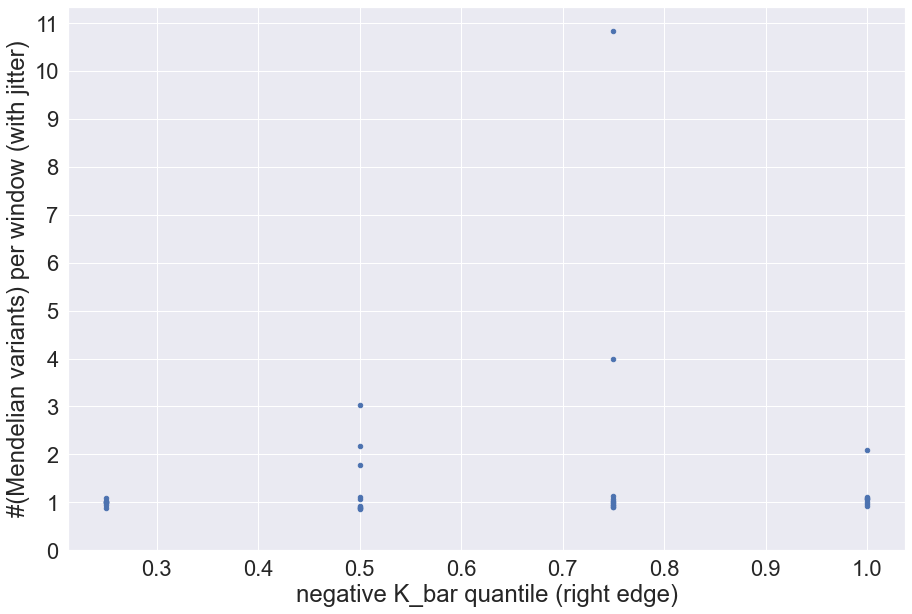

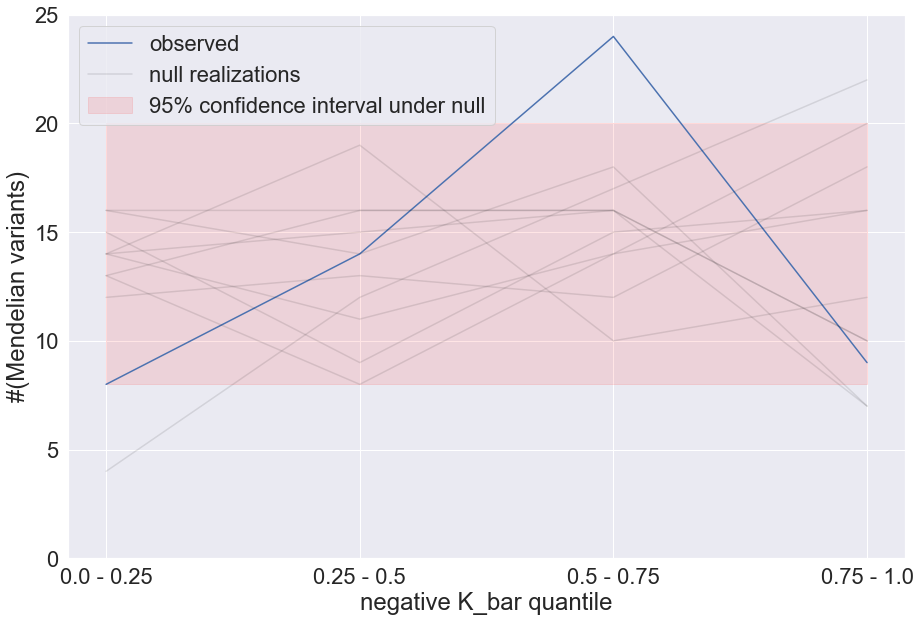

In [11]:
plot_all(exon_adjacent_windows_with_clinvar_mendelianVariants, zscore='negative K_bar', variant_type='Mendelian variant')

## To quantitatively assess the significance of the observed trends, we could do the following: 

In [12]:
# though it is quite likely under the null to observe the range of variant counts that we see, 
# we could assess how likely it is that we observe the degree of monotonic increase that we observe 

# Approach A: 
# 1. fit a linear regression to each null trajectory and compute the null distribution of slopes 
# 2. fit a linear regression to observed trajectory and use the null to compute a p-value 

# Approach B: 
# 1. compute the null distribution of kendall's tau 
# 2. compute the observed kendall's tau 
# 3. use the null distribution to compute the pvalue of the observed tau 